In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path1='/content/drive/MyDrive/cleaned_office_and sentiment_with_brand2.csv'

df=pd.read_csv(file_path1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,brand,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,polarity,sentiment
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",5.0,1374192000,93.060000,NaN,NaN,Office Products,Office & School Supplies,2013-07-19,2013,0,0,0,0.933333,Positive
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",5.0,1359417600,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2013-01-29,2013,0,0,0,0.291667,Neutral
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]",3.0,1318723200,23.242188,123GetInk -14-pack 5-black 3-cyan 3-magenta 3-...,NaN,Office Products,Office & School Supplies,2011-10-16,2011,0,0,0,0.106881,Neutral
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",5.0,1356912000,23.242188,Harry Potter Lenticular Hologram Bookmark - Ha...,NaN,Office Products,Office & School Supplies,2012-12-31,2012,0,0,0,0.766667,Positive
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",1.0,1379721600,23.242188,NaN,NaN,Office Products,Office & School Supplies,2013-09-21,2013,0,0,0,-0.400000,Negative


In [ ]:
df.dtypes

reviewerID          object
asin                object
reviewerName        object
helpful             object
overall            float64
unixReviewTime       int64
price              float64
title               object
main_category       object
sub_category        object
date                object
year                 int64
Helpful              int64
total_votes          int64
unhelpful_votes      int64
review              object
cleaned_text        object
polarity           float64
sentiment           object
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'reviewerID' and 'date' in ascending order
df = df.sort_values(by=['reviewerID', 'date'])

# Group the data by 'reviewerID'
grouped = df.groupby('reviewerID')

# Calculate the time difference between consecutive purchases and fill NaN values with -1
df['days_between_purchases'] = grouped['date'].diff().dt.days.fillna(-1)



In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,review,cleaned_text,polarity,sentiment,days_between_purchases
875203,A00001483M88NBD66LEP0,B004WPCQKG,JARPD,"[6, 7]",1.0,1353283200,23.242188,Eyepower UV MG Digital Currency Bill Money Cou...,Office Products,Office & School Supplies,2012-11-19,2012,6,7,1,No matter what we did the bills just kept jamm...,matter bill kept jamming machine bill count co...,-0.250000,Negative,5814.0
60021,A0001028APITAYQ44NF3,B00006IDP4,Brenda Lashua,"[0, 0]",5.0,1396310400,21.590000,"Hammermill Color Copy Paper, 100 Brightness, 1...",Office Products,Office & School Supplies,2014-04-01,2014,0,0,0,"This Hammermill 106125 - Color Copy Paper, 100...",hammermill color copy paper brightness lb x ph...,0.800000,Positive,5814.0
1074785,A0002382258OFJJ2UYNTR,B0090684TE,PreacherGurl,"[2, 2]",5.0,1358380800,83.660000,Displays2go Portable Lectern Presentation Stan...,Office Products,Office Furniture & Lighting,2013-01-17,2013,2,2,0,"Hi Everyone,Well, I ordered this for my bible ...",hi everyonewell ordered bible study group quit...,0.446667,Positive,5814.0
252487,A00031441FXF9AOR9AJK2,B000IV32JW,Brendan,"[0, 0]",1.0,1389139200,8.260000,100 Gram Digital Pocket Scale 100g X 0.01g (MS...,Office Products,Office & School Supplies,2014-01-08,2014,0,0,0,"The unit turns on, but the weight plate doesn'...",unit turn weight plate doesnt work say matter ...,0.000000,Neutral,5814.0
818975,A00034361UHTFM5E7KU8Q,B004HDY822,Sule Acikgoz,"[0, 0]",5.0,1356739200,9.240000,Remanufactured Canon PG30 PG-30 and CL31 CL-31...,Office Products,Office & School Supplies,2012-12-29,2012,0,0,0,They worked very well with my canon mp190. Don...,worked well canon mp dont waste money original...,0.468750,Positive,5814.0


In [ ]:
df['days_between_purchases'].value_counts()

-1.0       901238
 0.0       108206
 1.0         4037
 2.0         2308
 3.0         1946
            ...  
 2696.0         1
 3847.0         1
 4050.0         1
 2835.0         1
 5258.0         1
Name: days_between_purchases, Length: 3600, dtype: int64

In [ ]:
v1=df.loc[:,['overall','price','polarity']].values

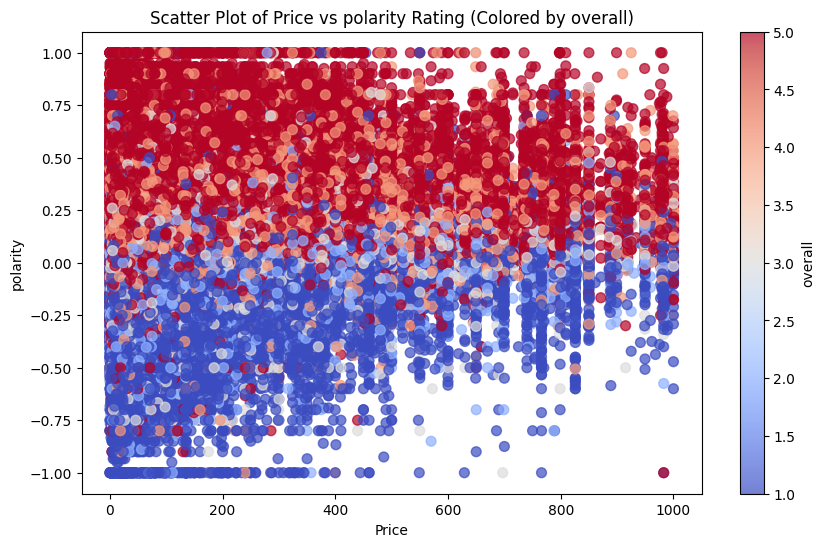

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(v1[:, 1], v1[:, 2], c=v1[:, 0] ,cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='overall')
plt.xlabel('Price')
plt.ylabel('polarity')
plt.title('Scatter Plot of Price vs polarity Rating (Colored by overall)')
plt.show()

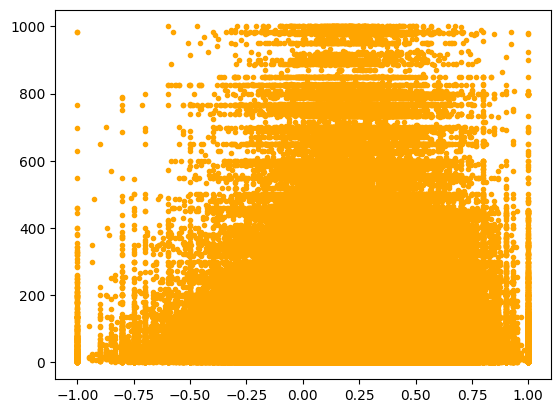

In [ ]:
plt.scatter(v1[ : , 2], v1[ : , 1],marker ='.', c='orange')

In [ ]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
v1_scaled = scaler.fit_transform(v1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

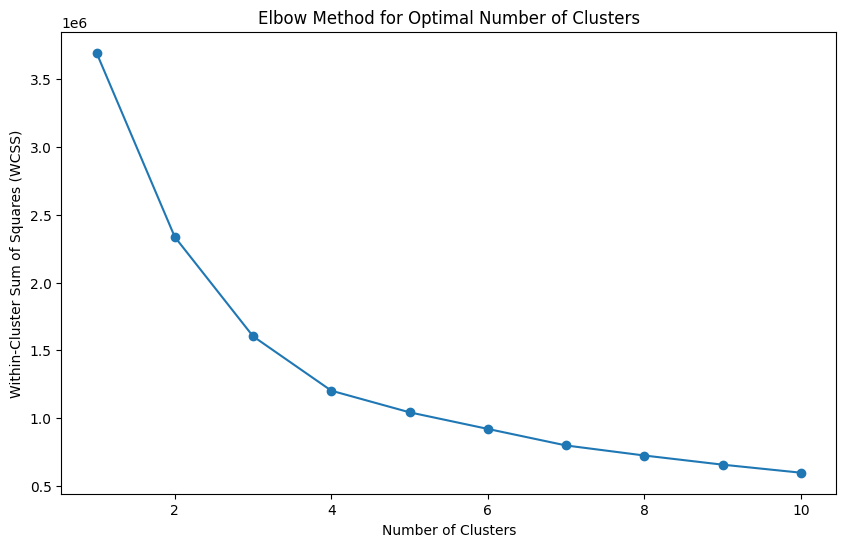

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(v1_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


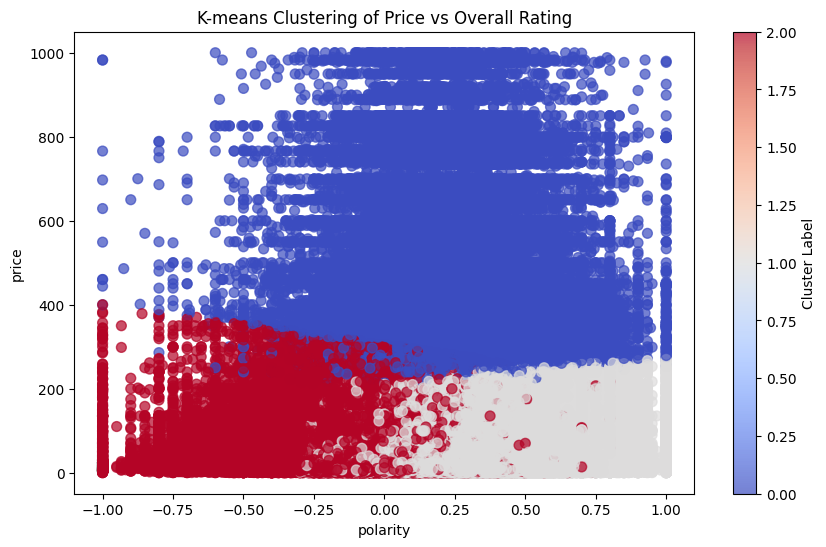

In [ ]:

# Perform K-means clustering
num_clusters = 3  # as by the graph
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(v1_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(v1[:, 2], v1[:, 1], c=cluster_labels, cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('polarity')
plt.ylabel('price')
plt.title('K-means Clustering of Price vs Overall Rating')
plt.show()

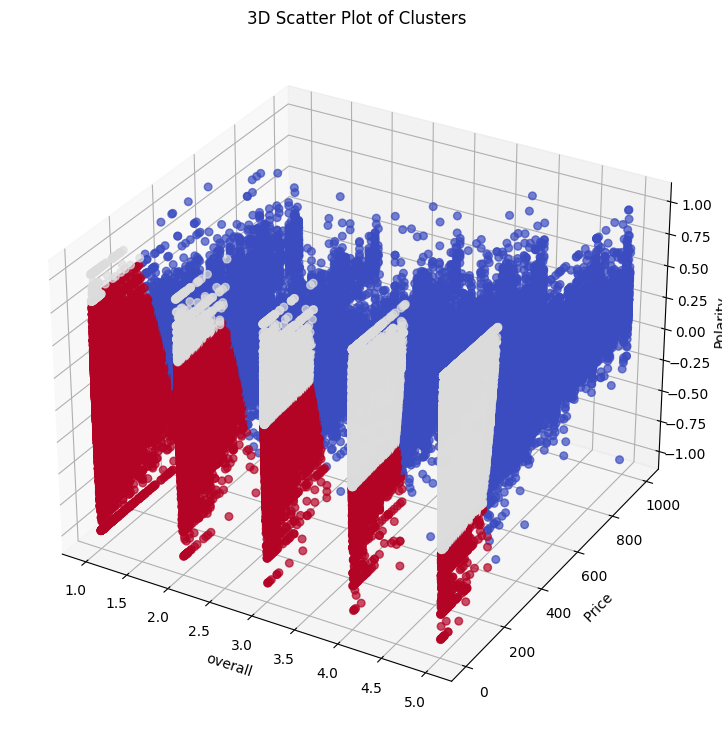

In [ ]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v1[:, 0], v1[:, 1], v1[:, 2], c=cluster_labels, cmap='coolwarm', s=30, alpha=0.7)
ax.set_xlabel('overall')
ax.set_ylabel(' Price')
ax.set_zlabel('Polarity')
ax.set_title('3D Scatter Plot of Clusters')
plt.show()

In [ ]:
df['km_cluster']=cluster_labels
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,title,main_category,sub_category,...,year,Helpful,total_votes,unhelpful_votes,review,cleaned_text,polarity,sentiment,days_between_purchases,km_cluster
875203,A00001483M88NBD66LEP0,B004WPCQKG,JARPD,"[6, 7]",1.0,1353283200,23.242188,Eyepower UV MG Digital Currency Bill Money Cou...,Office Products,Office & School Supplies,...,2012,6,7,1,No matter what we did the bills just kept jamm...,matter bill kept jamming machine bill count co...,-0.250000,Negative,-1.0,2
60021,A0001028APITAYQ44NF3,B00006IDP4,Brenda Lashua,"[0, 0]",5.0,1396310400,21.590000,"Hammermill Color Copy Paper, 100 Brightness, 1...",Office Products,Office & School Supplies,...,2014,0,0,0,"This Hammermill 106125 - Color Copy Paper, 100...",hammermill color copy paper brightness lb x ph...,0.800000,Positive,-1.0,1
1074785,A0002382258OFJJ2UYNTR,B0090684TE,PreacherGurl,"[2, 2]",5.0,1358380800,83.660000,Displays2go Portable Lectern Presentation Stan...,Office Products,Office Furniture & Lighting,...,2013,2,2,0,"Hi Everyone,Well, I ordered this for my bible ...",hi everyonewell ordered bible study group quit...,0.446667,Positive,-1.0,1
252487,A00031441FXF9AOR9AJK2,B000IV32JW,Brendan,"[0, 0]",1.0,1389139200,8.260000,100 Gram Digital Pocket Scale 100g X 0.01g (MS...,Office Products,Office & School Supplies,...,2014,0,0,0,"The unit turns on, but the weight plate doesn'...",unit turn weight plate doesnt work say matter ...,0.000000,Neutral,-1.0,2
818975,A00034361UHTFM5E7KU8Q,B004HDY822,Sule Acikgoz,"[0, 0]",5.0,1356739200,9.240000,Remanufactured Canon PG30 PG-30 and CL31 CL-31...,Office Products,Office & School Supplies,...,2012,0,0,0,They worked very well with my canon mp190. Don...,worked well canon mp dont waste money original...,0.468750,Positive,-1.0,1


In [ ]:
df['km_cluster'].value_counts()

1    875942
2    292978
0     62206
Name: km_cluster, dtype: int64

<Axes: >

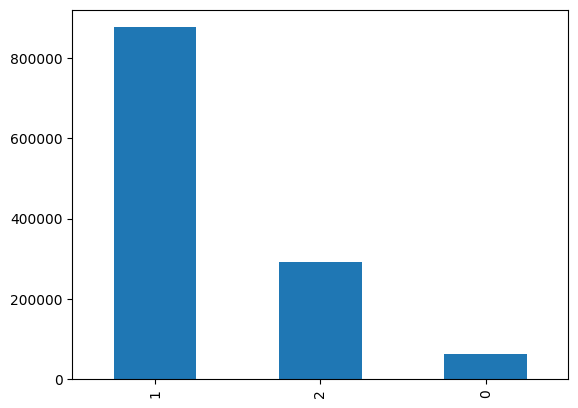

In [ ]:
df['km_cluster'].value_counts().plot(kind='bar')

<Axes: xlabel='km_cluster', ylabel='count'>

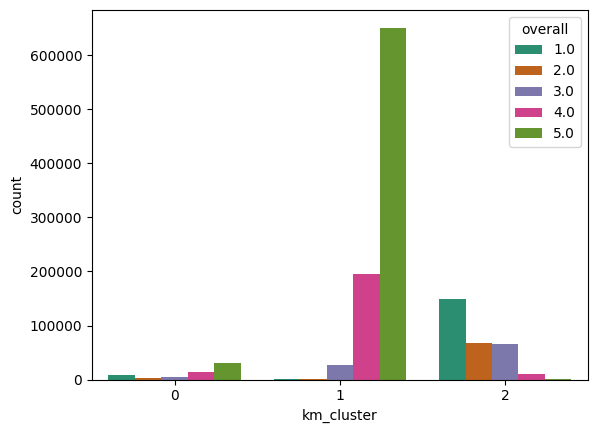

In [ ]:
sns.countplot(data=df, x='km_cluster', hue='overall', palette='Dark2')


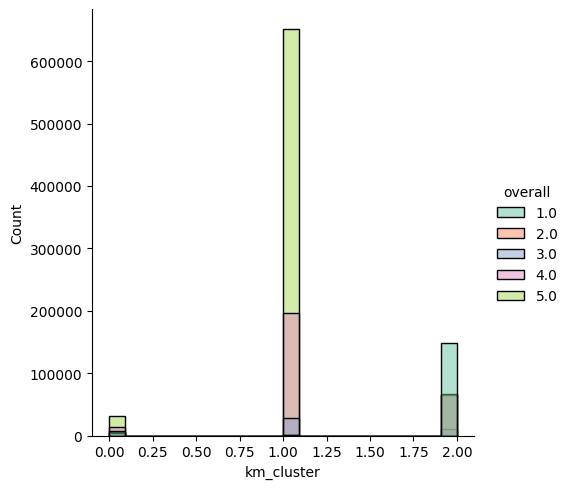

In [ ]:
sns.displot(x=df['km_cluster'],hue=df['overall'], palette='Set2')

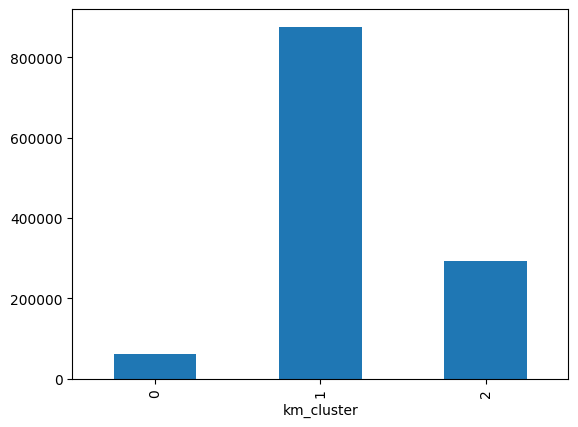

In [ ]:

df.groupby('km_cluster')['reviewerID'].count().plot(kind='bar');

In [ ]:
cross_tab = pd.crosstab(index=df['sub_category'], columns=df['km_cluster'])

cross_tab

km_cluster,0,1,2
sub_category,,,
Accessories,50,1709,387
Accessories & Supplies,50,64,27
Alternative Rock,0,68,11
Bath & Body,0,6,1
Beading & Jewelry-Making,0,176,27
Blues,0,8,1
Broadway & Vocalists,0,3,0
Cases,0,31,20
Cell Phones,0,155,117


In [ ]:
from google.colab import files
cross_tab.to_csv('clustering_sub_category.csv')
files.download('clustering_sub_category.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Recommendadtion
for i in df['km_cluster'].unique():
  print ('Cluster number : ',str(i))
  print('\n')
  print(10*'==')

  temp_df=df[['overall','sub_category','reviewerName','price','km_cluster']][df['km_cluster']== i]
  print('Rating :\n', temp_df['overall'].value_counts())
  print('\n')
  print(10*'==')
  print('Customer no : \n',temp_df['reviewerName'].value_counts())
  print('\n')
  print(10*'==')
  print('sub_category Frequency : \n',temp_df['sub_category'].value_counts())
  print('\n')
  print(10*'==')
  print('Sales : ',round(temp_df['price'].sum(),3))
  print('\n')
  print(10*'==')


Cluster number :  2


Rating :
 1.0    148387
2.0     67184
3.0     65558
4.0     10389
5.0      1460
Name: overall, dtype: int64


Customer no : 
 Amazon Customer         4299
Mike                     318
John                     286
Chris                    251
Pen Name                 229
                        ... 
MARC "Book Lover"          1
T. Weaver "wevrchic"       1
z28ftw                     1
Luscher                    1
tmybrgr                    1
Name: reviewerName, Length: 219100, dtype: int64


sub_category Frequency : 
 Office & School Supplies       181667
Office Electronics              94663
Office Furniture & Lighting     15797
Accessories                       387
Pop                               152
Cell Phones                       117
TV                                 38
Beading & Jewelry-Making           27
Accessories & Supplies             27
Children's Music                   24
Cases                              20
Computers & Accessories            13

# Clustering on CD and vinyl

In [3]:
file_path2='/content/drive/MyDrive/cleaned_cd_2.csv'

df2=pd.read_csv(file_path2)
df2.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,Helpful,total_votes,unhelpful_votes,date,year,polarity,sentiment
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",5.0,952819200,17.301576,CDs & Vinyl,Children's Music,18,18,0,2000-03-12,2000,0.353571,Positive
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]",5.0,946080000,17.301576,CDs & Vinyl,Children's Music,4,5,1,1999-12-25,1999,0.498636,Positive
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",5.0,943920000,17.301576,CDs & Vinyl,Children's Music,5,7,2,1999-11-30,1999,0.495833,Positive
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",5.0,952732800,17.301576,CDs & Vinyl,Children's Music,0,0,0,2000-03-11,2000,0.666667,Positive
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",5.0,1035504000,17.301576,CDs & Vinyl,Children's Music,9,12,3,2002-10-25,2002,0.233333,Neutral


In [ ]:
v2=df2.loc[:,['overall','price','polarity']].values

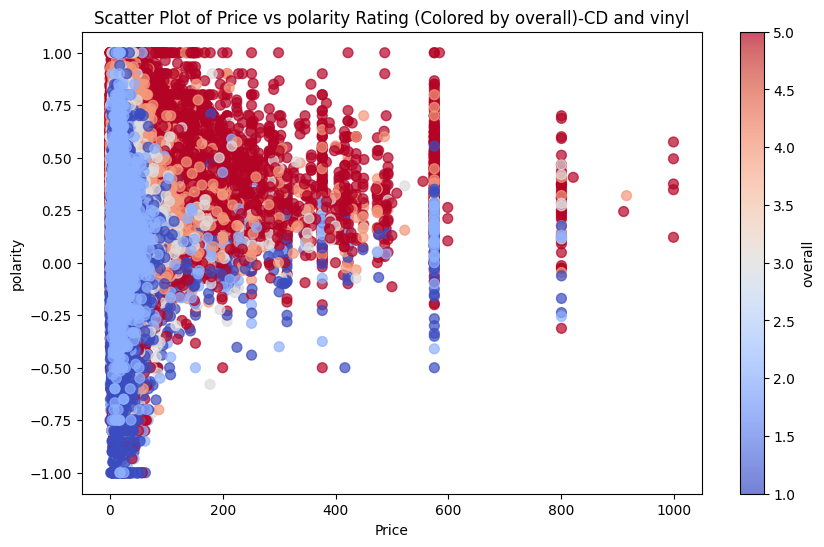

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(v2[:, 1], v2[:, 2], c=v2[:, 0] ,cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='overall')
plt.xlabel('Price')
plt.ylabel('polarity')
plt.title('Scatter Plot of Price vs polarity Rating (Colored by overall)-CD and vinyl')
plt.show()

In [ ]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
v2_scaled = scaler.fit_transform(v2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

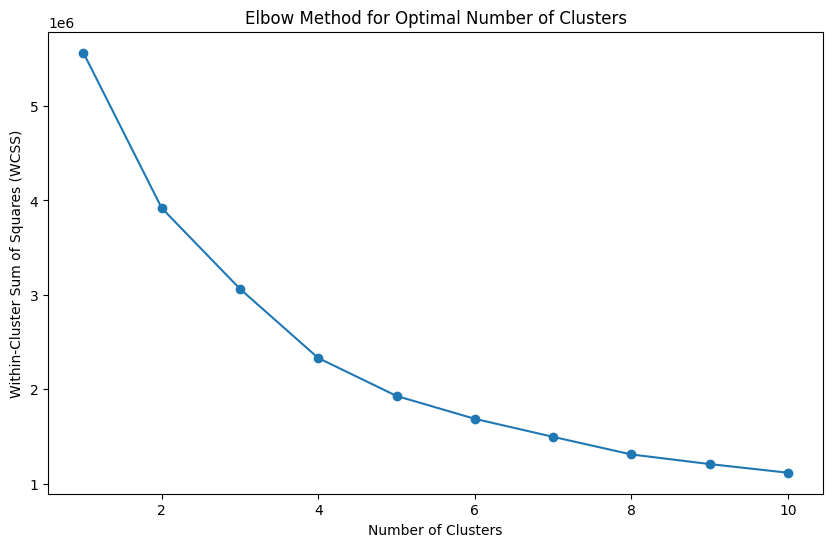

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(v2_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


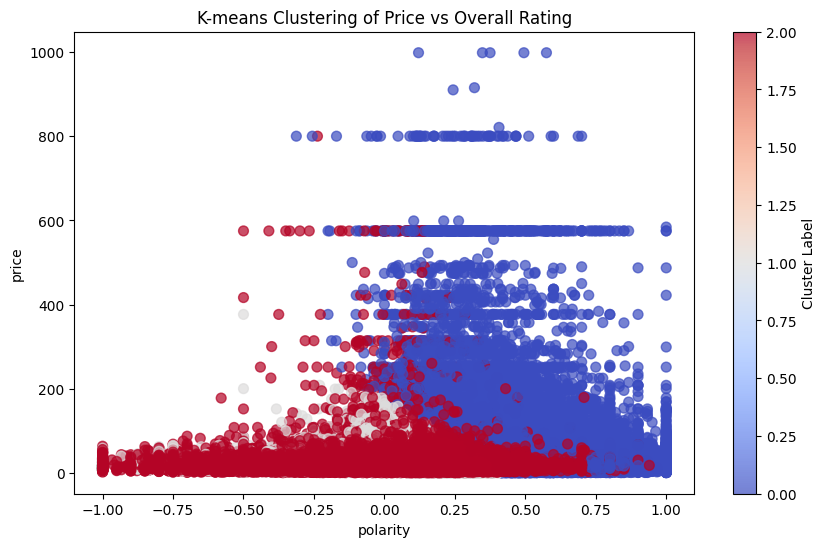

In [ ]:
# Perform K-means clustering
num_clusters = 3  # as by the graph
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(v2_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(v2[:, 2], v2[:, 1], c=cluster_labels, cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('polarity')
plt.ylabel('price')
plt.title('K-means Clustering of Price vs Overall Rating')
plt.show()

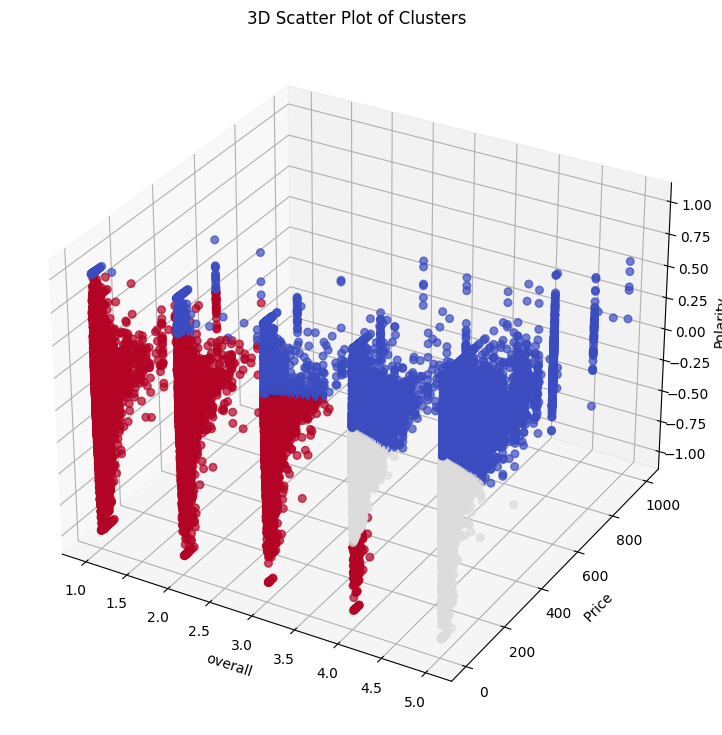

In [ ]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v2[:, 0], v2[:, 1], v2[:, 2], c=cluster_labels, cmap='coolwarm', s=30, alpha=0.7)
ax.set_xlabel('overall')
ax.set_ylabel(' Price')
ax.set_zlabel('Polarity')
ax.set_title('3D Scatter Plot of Clusters')
plt.show()

In [ ]:
df2['km_cluster']=cluster_labels
df2.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,Helpful,total_votes,unhelpful_votes,date,year,polarity,sentiment,km_cluster
0,A8KQVSFUOXV94,B000025RE0,*G*,"[18, 18]",5.0,952819200,17.301576,CDs & Vinyl,Children's Music,18,18,0,2000-03-12,2000,0.353571,Positive,1
1,A1Z4VJLNXFJB35,B000025RE0,brent c holmes,"[4, 5]",5.0,946080000,17.301576,CDs & Vinyl,Children's Music,4,5,1,1999-12-25,1999,0.498636,Positive,0
2,A2TJQC03EHXVMO,B000025RE0,Danielle,"[5, 7]",5.0,943920000,17.301576,CDs & Vinyl,Children's Music,5,7,2,1999-11-30,1999,0.495833,Positive,0
3,A2ZMN85Z1M25JE,B000025RE0,"""laguy03""","[0, 0]",5.0,952732800,17.301576,CDs & Vinyl,Children's Music,0,0,0,2000-03-11,2000,0.666667,Positive,0
4,A1N0Y0SXYD831C,B000025RE0,Jannita,"[9, 12]",5.0,1035504000,17.301576,CDs & Vinyl,Children's Music,9,12,3,2002-10-25,2002,0.233333,Neutral,1


In [ ]:
df2['km_cluster'].value_counts()

1    995045
0    594626
2    264988
Name: km_cluster, dtype: int64

<Axes: >

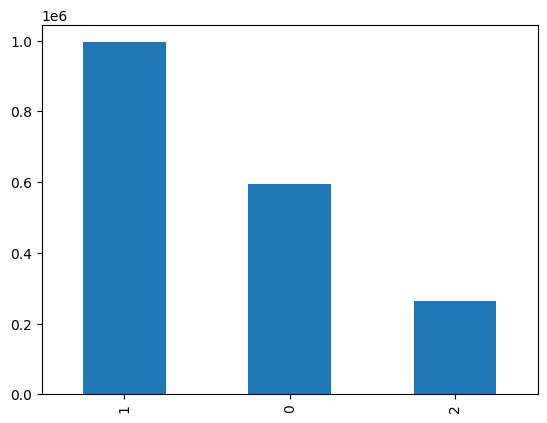

In [ ]:
df2['km_cluster'].value_counts().plot(kind='bar')

<Axes: xlabel='km_cluster', ylabel='count'>

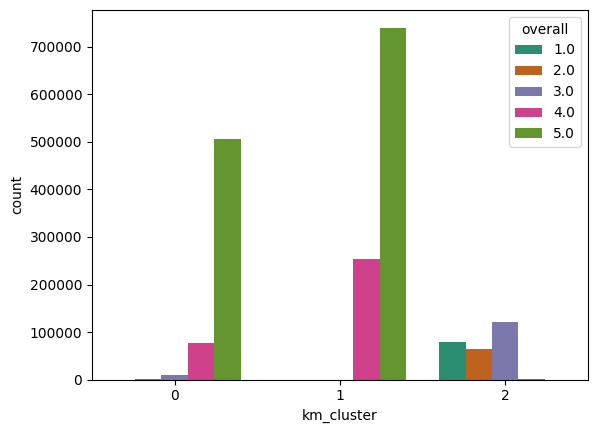

In [ ]:
sns.countplot(data=df2, x='km_cluster', hue='overall', palette='Dark2')

In [5]:
df.drop(columns=['brand','title'],inplace=True)

## unhelpfull votes

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName       0
helpful            0
overall            0
unixReviewTime     0
price              0
title              0
main_category      0
sub_category       0
date               0
year               0
Helpful            0
total_votes        0
unhelpful_votes    0
polarity           0
sentiment          0
dtype: int64

In [ ]:
df2.isnull().sum()

reviewerID         0
asin               0
reviewerName       0
helpful            0
overall            0
unixReviewTime     0
price              0
main_category      0
sub_category       0
Helpful            0
total_votes        0
unhelpful_votes    0
date               0
year               0
polarity           0
sentiment          0
dtype: int64

In [6]:
# Reorder columns to align them
df2 = df2[df.columns]


In [8]:
# Concatenate the DataFrames along the rows (axis=0)
rv_df = pd.concat([df, df2])
rv_df.reset_index(drop=True, inplace=True)
rv_df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,price,main_category,sub_category,date,year,Helpful,total_votes,unhelpful_votes,polarity,sentiment
0,A2UESEUCI73CBO,0078800242,Karen Lange,"[0, 0]",5.0,1374192000,93.060000,Office Products,Office & School Supplies,2013-07-19,2013,0,0,0,0.933333,Positive
1,A3BBNK2R5TUYGV,0113000316,b,"[0, 0]",5.0,1359417600,23.242188,Office Products,Office & School Supplies,2013-01-29,2013,0,0,0,0.291667,Neutral
2,A5J78T14FJ5DU,0113000316,N. Sommers,"[0, 0]",3.0,1318723200,23.242188,Office Products,Office & School Supplies,2011-10-16,2011,0,0,0,0.106881,Neutral
3,A2P462UH5L6T57,043928631X,D. Morrissey,"[0, 0]",5.0,1356912000,23.242188,Office Products,Office & School Supplies,2012-12-31,2012,0,0,0,0.766667,Positive
4,A2E0X1MWNRTQF4,0439340039,Drake's mom,"[0, 0]",1.0,1379721600,23.242188,Office Products,Office & School Supplies,2013-09-21,2013,0,0,0,-0.400000,Negative


In [ ]:
len(rv_df)

3090972

In [ ]:
rv_df.dtypes

reviewerID          object
asin                object
reviewerName        object
helpful             object
overall            float64
unixReviewTime       int64
price              float64
main_category       object
sub_category        object
date                object
year                 int64
Helpful              int64
total_votes          int64
unhelpful_votes      int64
polarity           float64
sentiment           object
dtype: object

In [9]:
rv_df.to_csv('dashboard.csv')

In [ ]:
# Filter rows where unhelpful votes are 80% or more of total votes
filtered_df = df[df['unhelpful_votes'] / df['total_votes'] >= 0.8]


In [ ]:
result = filtered_df[['reviewerID', 'reviewerName','unhelpful_votes']].sort_values(by=['unhelpful_votes'], ascending=False)

# Drop duplicate rows (if any)
result = result.drop_duplicates()

# Display the result
result.head(10)

,reviewerID,reviewerName,unhelpful_votes
155152,A1M7VWY3SZ0Z6J,Intelligent Woman,395
573907,A3GH4XY4VGE0TX,J. Day,375
154899,A22OXA9ZV9RRUY,da hammer,323
155110,ACPCRJICJ024Z,Hay-Man,308
573917,AA63JPV7NFRLI,J. Goodwin,297
155702,A1SQENHO64JLDC,Romneygirl,272
573998,AVZKGXVR11V8,Momof4boys,261
155851,A3I7LWJHMTVKJ9,"Theresa Mayer ""Bama Girl""",258
962724,A30E269AJSBB3N,KS,235
154809,A3PB5ZRSVRV550,Carla R Aannerud,232


In [ ]:
len(result)

58011

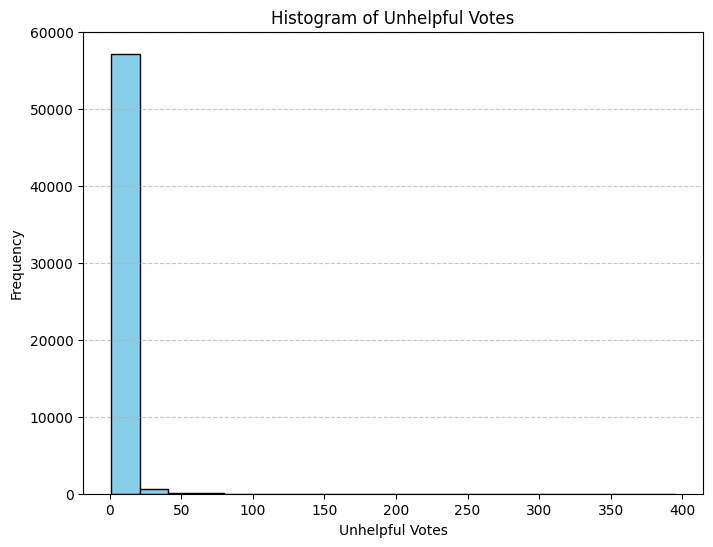

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(result['unhelpful_votes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Unhelpful Votes')
plt.xlabel('Unhelpful Votes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
result = result[result['unhelpful_votes'] >= 10]

result.reset_index(drop=True, inplace=True)

result.head(10)


,reviewerID,reviewerName,unhelpful_votes
0,A1M7VWY3SZ0Z6J,Intelligent Woman,395
1,A3GH4XY4VGE0TX,J. Day,375
2,A22OXA9ZV9RRUY,da hammer,323
3,ACPCRJICJ024Z,Hay-Man,308
4,AA63JPV7NFRLI,J. Goodwin,297
5,A1SQENHO64JLDC,Romneygirl,272
6,AVZKGXVR11V8,Momof4boys,261
7,A3I7LWJHMTVKJ9,"Theresa Mayer ""Bama Girl""",258
8,A30E269AJSBB3N,KS,235
9,A3PB5ZRSVRV550,Carla R Aannerud,232


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['unhelpful_votes'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['unhelpful_votes'], **{})
chart

In [ ]:
len(result)

2410

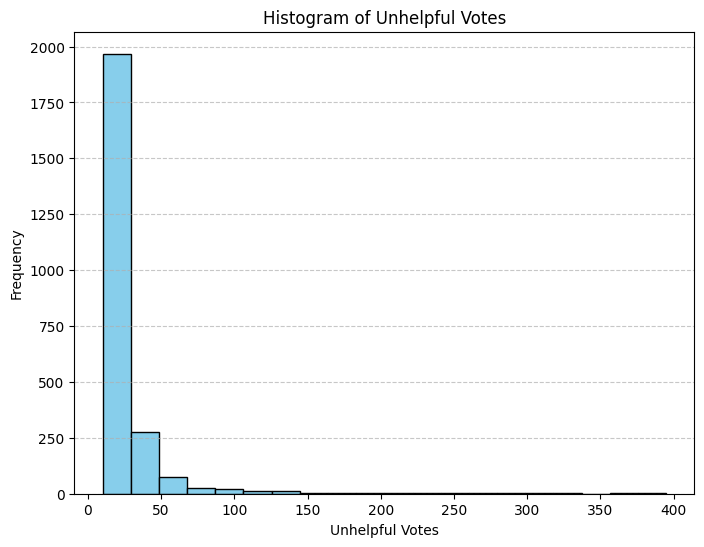

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(result['unhelpful_votes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Unhelpful Votes')
plt.xlabel('Unhelpful Votes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
result.to_csv('fake_review.csv')